# Scraping Data from IMDB and Metacritic Ratings Websites

## Objective

Web Scraping & Analyzing the distributions of IMDB and Metacritic movie ratings

## Working out which pages to scrape

When exploring the IMDB website, Metacritic scores are shown on the IMDB movie page, so that it can be scrape both ratings with a single request.

![alt text](http://i.imgur.com/xaMDRSW.png)

investigate the IMDB site further, discover that the page shown below. It contains all the data needed for 50 movies.

![alt url](http://i.imgur.com/ucuRGP6.png)

## Identifying the URL structure

This is the URL from the picture above:

         http://www.imdb.com/search/title?release_date=2017&sort=num_votes,desc&page=2&ref_=adv_nxt

In the URL above, see that the URL has several parameters after the question mark:

    release_date - Shows only the movies released in a specific year.
    sort - Sorts the movies on the page. sort=num_votes,desc translates to sort by number of votes in a descending order.
    page - Specifies the page number.
    ref_ - Takes us to the the next or the previous page. The reference is the page we are currently on. adv_nxt and adv_prv are two possible values. They translate to advance to the next page, and advance to the previous page, respectively.

Writing the script by requesting the content of this single web page:

        http://www.imdb.com/search/title?release_date=2017&sort=num_votes,desc&page=1

In [1]:
from requests import get

url = 'http://www.imdb.com/search/title?release_date=2017&sort=num_votes,desc&page=1'

response = get(url)
print(response.text[:500])





<!DOCTYPE html>
<html
xmlns:og="http://ogp.me/ns#"
xmlns:fb="http://www.facebook.com/2008/fbml">
    <head>
        <meta charset="utf-8">
        <meta http-equiv="X-UA-Compatible" content="IE=edge">

    <meta name="apple-itunes-app" content="app-id=342792525, app-argument=imdb:///?src=mdot">
            <script type="text/javascript">var ue_t0=window.ue_t0||+new Date();</script>
            <script type="text/javascript">
                var ue_mid = "A1EVAM02EL8SFB"; 
                var


## Understanding the HTML structure of a single page

Extract all these 50 containers by parsing the HTML document from our earlier request using the browser’s Developer Tools

![alt url](http://i.imgur.com/izlee3x.png)

## Using BeautifulSoup to parse the HTML content

In [2]:
from bs4 import BeautifulSoup

html_soup = BeautifulSoup(response.text, 'html.parser')
type(html_soup)

bs4.BeautifulSoup

In [3]:
movie_containers = html_soup.find_all('div', class_ = 'lister-item mode-advanced')
print(type(movie_containers))
print(len(movie_containers))

<class 'bs4.element.ResultSet'>
50


## Extracting the data for a single movie

In [4]:
first_movie = movie_containers[0]
first_movie

<div class="lister-item mode-advanced">
<div class="lister-top-right">
<div class="ribbonize" data-caller="filmosearch" data-tconst="tt3315342"></div>
</div>
<div class="lister-item-image float-left">
<a href="/title/tt3315342/?ref_=adv_li_i"> <img alt="Logan" class="loadlate" data-tconst="tt3315342" height="98" loadlate="https://images-na.ssl-images-amazon.com/images/M/MV5BMjQwODQwNTg4OV5BMl5BanBnXkFtZTgwMTk4MTAzMjI@._V1_UX67_CR0,0,67,98_AL_.jpg" src="http://ia.media-imdb.com/images/G/01/imdb/images/nopicture/large/film-184890147._CB522736516_.png" width="67"/>
</a> </div>
<div class="lister-item-content">
<h3 class="lister-item-header">
<span class="lister-item-index unbold text-primary">1.</span>
<a href="/title/tt3315342/?ref_=adv_li_tt">Logan</a>
<span class="lister-item-year text-muted unbold">(2017)</span>
</h3>
<p class="text-muted ">
<span class="certificate">21+</span>
<span class="ghost">|</span>
<span class="runtime">137 min</span>
<span class="ghost">|</span>
<span class="

Notice that the HTML content of one container is very long. To find out the HTML line specific to each data point, use the browser DevTools once again.

## The name of the movie

In [5]:
first_movie.div

<div class="lister-top-right">
<div class="ribbonize" data-caller="filmosearch" data-tconst="tt3315342"></div>
</div>

In [6]:
first_movie.a

<a href="/title/tt3315342/?ref_=adv_li_i"> <img alt="Logan" class="loadlate" data-tconst="tt3315342" height="98" loadlate="https://images-na.ssl-images-amazon.com/images/M/MV5BMjQwODQwNTg4OV5BMl5BanBnXkFtZTgwMTk4MTAzMjI@._V1_UX67_CR0,0,67,98_AL_.jpg" src="http://ia.media-imdb.com/images/G/01/imdb/images/nopicture/large/film-184890147._CB522736516_.png" width="67"/>
</a>

In [7]:
first_movie.h3

<h3 class="lister-item-header">
<span class="lister-item-index unbold text-primary">1.</span>
<a href="/title/tt3315342/?ref_=adv_li_tt">Logan</a>
<span class="lister-item-year text-muted unbold">(2017)</span>
</h3>

In [8]:
first_movie.h3.a

<a href="/title/tt3315342/?ref_=adv_li_tt">Logan</a>

In [9]:
first_name = first_movie.h3.a.text
first_name

'Logan'

## The year of the movie’s release

In [10]:
first_year = first_movie.h3.find('span', class_ = 'lister-item-year text-muted unbold')
first_year

<span class="lister-item-year text-muted unbold">(2017)</span>

In [11]:
first_year = first_year.text
first_year

'(2017)'

## The IMDB rating

In [12]:
first_movie.strong

<strong>8.2</strong>

In [13]:
first_imdb = float(first_movie.strong.text)
first_imdb

8.2

## The Metascore

In [15]:
first_mscore = first_movie.find('span', class_ = 'metascore favorable')
first_mscore = int(first_mscore.text)
print(first_mscore)

77


## The number of votes

In [16]:
first_votes = first_movie.find('span', attrs = {'name':'nv'})
first_votes

<span data-value="366597" name="nv">366,597</span>

In [17]:
first_votes['data-value']

'366597'

In [18]:
first_votes = int(first_votes['data-value'])

## The script for a single page

Notice to adding a condition to skip movies without a Metascore.

In [19]:
eighth_movie_mscore = movie_containers[7].find('div', class_ = 'ratings-metascore')
type(eighth_movie_mscore)

bs4.element.Tag

In [20]:
# Lists to store the scraped data in
names = []
years = []
imdb_ratings = []
metascores = []
votes = []

# Extract data from individual movie container
for container in movie_containers:
    
    # If the movie has Metascore, then extract:
    if container.find('div', class_ = 'ratings-metascore') is not None:
        
        # The name
        name = container.h3.a.text
        names.append(name)
        
        # The year
        year = container.h3.find('span', class_ = 'lister-item-year').text
        years.append(year)
        
        # The IMDB rating
        imdb = float(container.strong.text)
        imdb_ratings.append(imdb)
        
        # The Metascore
        m_score = container.find('span', class_ = 'metascore').text
        metascores.append(int(m_score))
        
        # The number of votes
        vote = container.find('span', attrs = {'name':'nv'})['data-value']
        votes.append(int(vote))

In [22]:
import pandas as pd
The script for multiple pagestest_df = pd.DataFrame({'movie': names,
                       'year': years,
                       'imdb': imdb_ratings,
                       'metascore': metascores,
                       'votes': votes})
print(test_df.info())
test_df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33 entries, 0 to 32
Data columns (total 5 columns):
imdb         33 non-null float64
metascore    33 non-null int64
movie        33 non-null object
votes        33 non-null int64
year         33 non-null object
dtypes: float64(1), int64(2), object(2)
memory usage: 1.4+ KB
None


,imdb,metascore,movie,votes,year
0,8.2,77,Logan,366597,(2017)
1,7.8,76,Wonder Woman,233895,(2017)
2,7.9,67,Guardians of the Galaxy Vol. 2,229876,(2017)
3,8.4,94,Dunkirk,184245,(2017)
4,7.6,75,John Wick: Chapter 2,173259,(2017)
5,7.8,84,Get Out,166980,(I) (2017)
6,7.4,65,Beauty and the Beast,160637,(2017)
7,6.8,62,Kong: Skull Island,152562,(2017)
8,7.9,73,Spider-Man: Homecoming,145764,(2017)
9,6.6,65,Alien: Covenant,135684,(2017)


## The script for multiple pages

Scrape the first 4 pages of each year in the interval 2000-2017. 4 pages for each of the 18 years makes for a total of 72 pages. Each page has 50 movies, so total scrape data for 3600 movies at most. But not all the movies have a Metascore, so the number will be lower than that.

## Changing the URL’s parameters

In [23]:
pages = [str(i) for i in range(1,5)]
years_url = [str(i) for i in range(2000,2018)]

## Monitoring the loop as it’s still going

In [24]:
from time import sleep
from random import randint

Monitor the following parameters:

    The frequency (speed) of requests, make sure the program is not overloading the server.
    The number of requests, halt the loop in case the number of expected requests is exceeded.
    The status code of our requests, make sure the server is sending back the proper responses.

In [25]:
from time import time

start_time = time()
requests = 0

for _ in range(5):
    # A request would go here
    requests += 1
    sleep(randint(1,3))
    elapsed_time = time() - start_time
    print('Request: {}; Frequency: {} requests/s'.format(requests, requests/elapsed_time))

Request: 1; Frequency: 0.33310780958891806 requests/s
Request: 2; Frequency: 0.3332184154737831 requests/s
Request: 3; Frequency: 0.3330675056825425 requests/s
Request: 4; Frequency: 0.3632331862297922 requests/s
Request: 5; Frequency: 0.3568302552701472 requests/s


In [26]:
from IPython.core.display import clear_output

start_time = time()
requests = 0

for _ in range(5):
    # A request would go here
    requests += 1
    sleep(randint(1,3))
    current_time = time()
    elapsed_time = current_time - start_time
    print('Request: {}; Frequency: {} requests/s'.format(requests, requests/elapsed_time))
    clear_output(wait = True)

Request: 5; Frequency: 0.4996410564348103 requests/s


Set the program to warn if there’s something off.

In [27]:
from warnings import warn

warn("Warning Simulation")

F:\ANACONDA\lib\site-packages\ipykernel\__main__.py:3: UserWarning: Warning Simulation
  app.launch_new_instance()


## Piecing everything together

In [29]:
# Redeclaring the lists to store data in
names = []
years = []
imdb_ratings = []
metascores = []
votes = []
headers = {"Accept-Language": "en-US, en;q=0.5"}headers = {"Accept-Language": "en-US, en;q=0.5"}
# Preparing the monitoring of the loop
start_time = time()
requests = 0

# For every year in the interval 2000-2017
for year_url in years_url:
    
    # For every page in the interval 1-4
    for page in pages:
        
        # Make a get request
        response = get('http://www.imdb.com/search/title?release_date=' + year_url + 
        '&sort=num_votes,desc&page=' + page, headers = headers)
        
        # Pause the loop
        sleep(randint(8,15))
        
        # Monitor the requests
        requests += 1
        elapsed_time = time() - start_time
        print('Request:{}; Frequency: {} requests/s'.format(requests, requests/elapsed_time))
        clear_output(wait = True)
              
        # Throw a warning for non-200 status codes
        if response.status_code != 200:
            warn('Request: {}; Status code: {}'.format(requests, response.status_code))
              
        # Break the loop if the number of requests is greater than expected
        if requests > 72:
            warn('Number of requests was greater than expected.')  
            break 
        
        # Parse the content of the request with BeautifulSoup
        page_html = BeautifulSoup(response.text, 'html.parser')
        
        # Select all the 50 movie containers from a single page
        mv_containers = page_html.find_all('div', class_ = 'lister-item mode-advanced')
        
        # For every movie of these 50
        for container in mv_containers:
            # If the movie has a Metascore, then:
            if container.find('div', class_ = 'ratings-metascore') is not None:
                
                # Scrape the name
                name = container.h3.a.text
                names.append(name)
                
                # Scrape the year 
                year = container.h3.find('span', class_ = 'lister-item-year').text
                years.append(year)

                # Scrape the IMDB rating
                imdb = float(container.strong.text)
                imdb_ratings.append(imdb)

                # Scrape the Metascore
                m_score = container.find('span', class_ = 'metascore').text
                metascores.append(int(m_score))

                # Scrape the number of votes
                vote = container.find('span', attrs = {'name':'nv'})['data-value']
                votes.append(int(vote))

Request:72; Frequency: 0.07520453254107942 requests/s


## Examining the scraped data

In [30]:
movie_ratings = pd.DataFrame({'movie': names,
                              'year': years,
                              'imdb': imdb_ratings,
                              'metascore': metascores,
                              'votes': votes})
print(movie_ratings.info())
movie_ratings.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2898 entries, 0 to 2897
Data columns (total 5 columns):
imdb         2898 non-null float64
metascore    2898 non-null int64
movie        2898 non-null object
votes        2898 non-null int64
year         2898 non-null object
dtypes: float64(1), int64(2), object(2)
memory usage: 113.3+ KB
None


,imdb,metascore,movie,votes,year
0,8.5,67,Gladiator,1073310,(2000)
1,8.5,80,Memento,921553,(2000)
2,8.3,55,Snatch,650240,(2000)
3,8.3,68,Requiem for a Dream,624691,(2000)
4,7.4,64,X-Men,490294,(2000)
5,7.7,73,Cast Away,426667,(2000)
6,7.6,64,American Psycho,388033,(2000)
7,7.2,62,Unbreakable,277926,(2000)
8,7.0,73,Meet the Parents,273949,(2000)
9,6.1,59,Mission: Impossible II,259055,(2000)


## Cleaning the scraped data

In [31]:
movie_ratings = movie_ratings[['movie', 'year', 'imdb', 'metascore', 'votes']]
movie_ratings.head()

,movie,year,imdb,metascore,votes
0,Gladiator,(2000),8.5,67,1073310
1,Memento,(2000),8.5,80,921553
2,Snatch,(2000),8.3,55,650240
3,Requiem for a Dream,(2000),8.3,68,624691
4,X-Men,(2000),7.4,64,490294


Convert all the values in the year column to integers.

In [32]:
movie_ratings['year'].unique()

array(['(2000)', '(I) (2000)', '(2001)', '(I) (2001)', '(2002)',
       '(I) (2002)', '(2003)', '(I) (2003)', '(2004)', '(I) (2004)',
       '(2005)', '(I) (2005)', '(2006)', '(I) (2006)', '(2007)',
       '(I) (2007)', '(2008)', '(I) (2008)', '(2009)', '(I) (2009)',
       '(II) (2009)', '(2010)', '(I) (2010)', '(II) (2010)', '(2011)',
       '(I) (2011)', '(IV) (2011)', '(2012)', '(I) (2012)', '(II) (2012)',
       '(2013)', '(I) (2013)', '(II) (2013)', '(2014)', '(I) (2014)',
       '(II) (2014)', '(III) (2014)', '(2015)', '(I) (2015)',
       '(II) (2015)', '(VI) (2015)', '(III) (2015)', '(2016)',
       '(II) (2016)', '(I) (2016)', '(IX) (2016)', '(V) (2016)', '(2017)',
       '(I) (2017)', '(III) (2017)', '(IV) (2017)', '(II) (2017)'], dtype=object)

In [33]:
movie_ratings.loc[:, 'year'] = movie_ratings['year'].str[-5:-1].astype(int)

In [34]:
movie_ratings['year'].head(3)

0    2000
1    2000
2    2000
Name: year, dtype: int32

Check the minimum and maximum values of each type of rating

In [35]:
movie_ratings.describe().loc[['min', 'max'], ['imdb', 'metascore']]

,imdb,metascore
min,1.6,7.0
max,9.0,100.0


Normalize the imdb column to a 100-points scale.

In [36]:
movie_ratings['n_imdb'] = movie_ratings['imdb'] * 10
movie_ratings.head(3)

,movie,year,imdb,metascore,votes,n_imdb
0,Gladiator,2000,8.5,67,1073310,85.0
1,Memento,2000,8.5,80,921553,85.0
2,Snatch,2000,8.3,55,650240,83.0


Save this dataset locally.

In [37]:
movie_ratings.to_csv('movie_ratings.csv')

## Plotting and analyzing the distributions

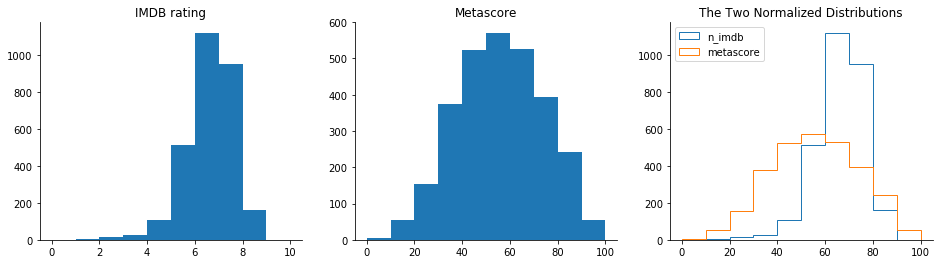

In [38]:
import matplotlib.pyplot as plt
%matplotlib inline

fig, axes = plt.subplots(nrows = 1, ncols = 3, figsize = (16,4))
ax1, ax2, ax3 = fig.axes

ax1.hist(movie_ratings['imdb'], bins = 10, range = (0,10)) # bin range = 1
ax1.set_title('IMDB rating')

ax2.hist(movie_ratings['metascore'], bins = 10, range = (0,100)) # bin range = 10
ax2.set_title('Metascore')

ax3.hist(movie_ratings['n_imdb'], bins = 10, range = (0,100), histtype = 'step')
ax3.hist(movie_ratings['metascore'], bins = 10, range = (0,100), histtype = 'step')
ax3.legend(loc = 'upper left')
ax3.set_title('The Two Normalized Distributions')

for ax in fig.axes:
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

plt.show()

See that in IMDB, most ratings are between 6 and 8. There are few movies with a rating greater than 8, and even fewer with a rating smaller than 4. This indicates that both very good movies and very bad movies are rarer.


The distribution of Metascore ratings resembles a normal distribution - most ratings are average, peaking at the value of approximately 50. From this peak, the frequencies gradually decrease toward extreme rating values. According to this distribution, there are indeed fewer very good and very bad movies, but not that few as the IMDB ratings indicate.

## Summary

On the comparative graph, it’s clearer that the IMDB distribution is highly skewed toward the higher part of the average ratings, while the Metascore ratings seem to have a much more balanced distribution.

What might be the reason for that skew in the IMDB distribution? One hypothesis is that many users tend to have a binary method of assessing movies. If they like the movie, they give it a 10. If they don’t like the movie, they give it a very small rating, or they don’t bother to rate the movie. This an interesting problem that’s worth being explored in more detail.